<a href="https://colab.research.google.com/github/yscope75/CS2225.CH2001020/blob/master/Image_captioning_Master_courses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Update torchtext version
!pip3 install torchvision==0.8.0
!pip3 install torchtext==0.8.0

     |████████████████████████████████| 11.8MB 3.9MB/s 
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 6.9MB 4.9MB/s 
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [2]:
import torchvision.datasets as dset
import torchvision.datasets.utils as dset_utils
import torchvision.transforms as transforms
import os

In [16]:
import torch
from torch import nn
import torchvision
from torchsummary import summary
import json 
import matplotlib.pyplot as plt
import collections
from PIL import Image
import torchtext
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
from torch.nn.utils.rnn import pad_sequence

In [4]:
data_folder = os.path.join(os.path.abspath('.') + '/coco/')
# Download and unzip annotations
if not os.path.exists(data_folder):
  dset_utils.download_and_extract_archive(url='http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
                                          download_root=data_folder,
                                          extract_root=data_folder,
                                          filename='captions.zip')
  # Download and unzion images
  dset_utils.download_and_extract_archive(url='http://images.cocodataset.org/zips/train2014.zip',
                                          download_root=data_folder,
                                          extract_root=data_folder,
                                          filename='train2014.zip')
  

Extracting /content/coco/captions.zip to /content/coco/


Extracting /content/coco/train2014.zip to /content/coco/


In [ ]:
# Get path to file and delete zip file
captions_train = os.path.join(data_folder, 'annotations/captions_train2014.json')
images_train = os.path.join(data_folder, 'train2014/')
captions_zip = os.path.join(data_folder, 'captions.zip')
images_zip = os.path.join(data_folder, 'train2014.zip')
os.remove(captions_zip)
os.remove(images_zip)

In [ ]:
# Create dictionary of data
coco_caption = collections.defaultdict(list)

with open(captions_train, 'r') as f:
  annotations = json.load(f)

for val in annotations['annotations']:
  caption = val['caption']
  image_path = images_train + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
  coco_caption[image_path].append(caption)

coco_caption

In [11]:
train_captions = []
img_name_vector = []

for image_path in list(coco_caption.keys()):
  caption_list = coco_caption[image_path]
  train_captions.extend(caption_list)
  img_name_vector.extend([image_path] * len(caption_list))

In [13]:
# Find max len function
def find_max_len(tensor):
  return max(len(t) for t in tensor)

In [15]:
# Building vocabulary for annotations
tokenizer = get_tokenizer("basic_english")
def build_vocab(sentences, tokenizer):
  counter = Counter()
  for sen in sentences:
    counter.update(tokenizer(sen))
  return Vocab(counter, specials=['<unk>', '<pad>', '<bos>', '<eos>'])

en_vocab = build_vocab(train_captions, tokenizer)

In [ ]:
# define image loading function
image_preprocessor = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
def image_load(image_path):
  input_image = Image.open(image_path).convert('RGB')
  input_tensor = image_preprocessor(input_image)
  return input_tensor, image_path
  
def data_process(image_paths, captions):
  data = []
  for img, cap in zip(image_paths, captions):
    img_tensor = image_load(img)
    en_tensor = torch.tensor([en_vocab[token] for token in tokenizer(cap)],
                             dtype=torch.long)
    data.append((img_tensor, en_tensor))

  return data

train_data = data_process(img_name_vector, train_captions)

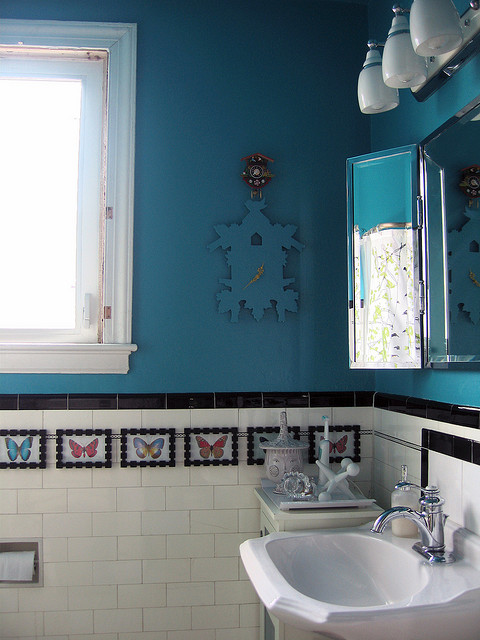

In [25]:
Image.open(img_name_vector[0])

In [ ]:
# Building data loader 
# Define params
BATCH_SIZE = 128
PAD_IDX = de_vocab['<pad>']
BOS_IDX = de_vocab['<bos>']
EOS_IDX = de_vocab['<eos>']

# generate batch function
def gen_batch()

Name: torchtext
Version: 0.3.1
Summary: Text utilities and datasets for PyTorch
Home-page: https://github.com/pytorch/text
Author: PyTorch core devs and James Bradbury
Author-email: jekbradbury@gmail.com
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: torch, numpy, tqdm, requests
Required-by: 


In [ ]:
# Setup device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Definition of main model
# Begin with Encoder
class Encoder(nn.Module):
  """
    Encode image input using pre-trained Resnet152 model on imagenet
  """
  def __init__(self):
    super(Encoder, self).__init__()
    resnet152 = torchvision.models.resnet152(pretrained=True)
    # remove the last two layers and keep the last CNN output 
    modules = list(resnet152.children())[:-2] 
    self.res_encoder = nn.Sequential(*modules) # last output (batch_size, 2048, 8, 8)
    # Flatten feature vector to (batch_size, 2048, 64)
    self.flat_embed = nn.Flatten(start_dim=2)
    # normalize variable input size to encoded size using adaptive pooling
    

  def forward(self, X_in):
    """
      The forward pass of encoder 
      args:
      - X_in: input data batch of size (batch, 3, Height, weight)
      return: encoded images of size (batch, embed_size, 64)
    """
    e_out = self.res_encoder(X_in) 
    # Flatten output vector to (batch_size, embedding_size, 64)
    e_out = self.flat_embed(e_out)
    # Change shape of output encoded to (batch_size, 64, embedding_dim)
    e_out = e_out.permute(0, 2, 1)
    return out
    
  

In [ ]:
class BahdanauAttention(nn.Module):
  """
    Define attention mechanism module on encoded image for genrating text
  """
  def __init__(self, encoder_dim, hidden_size, attention_size):
    """
      args: 
      - encoder_dim: size of encoded image (batch_size, 64, embedding_size(2048))
      - hidden_size: size of hidden unit in decoder RNN 
      - attention_size: 
    """
    super(BahdanauAttention, self).__init__()
    self.W1 = nn.Linear(encoder_dim, attention_size)   # size
    self.W2 = nn.Linear(hidden_size, attention_size)
    self.V = nn.Linear(attentions_size, 1)
    
    def forward(self, encoded_feature, hidden):
      """
        args:
        - encoded_feature: 
      """
      # expand time dimension for hidden layer in decoder (batch_size, 1, hidden_size)
      hidden_with_time = torch.unsqueeze(hidden, dim=1)
      # Compute attenntion for hidden (batch_size, 64, attention_size)
      attention_on_hidden = torch.tanh(self.w1(encoded_feature) + self.W2(hidden))
      # attention score on attention (batch, 64, 1)
      score = self.V(attention_on_hidden)
      # compute attention weights 
      attention_weights = torch.softmax(score, dim=1)
      context_vector = attention_weights*encoded_feature
      context_vector = torch.sum(context_vector, dim=1)
      
      return context_vector, attention_weights
    
    

In [ ]:
torch.manual_seed(3)
class DecoderWithAttention(nn.Module):
  def __init__(self,
               embedding_dim,
               hidden_size,
               vocab_size,
               encoded_dim,
               pretrained_embed=None):
    super(DecoderWithAttention, self).__init__()
    self.hidden_size = hidden_size
    self.vocab_size = vocab_size
    self.embedding_dim = embedding_dim
    self.encoded_dim = encoded_dim
    self.embedding = self.init_embedding(pretrained_embed)
    self.gru_in = self.embedding_dim + self.encoded_dim
    self.gru = nn.GRU(input_size=self.gru_in,
                      hidden_size=self.hidden_size,
                      batch_first=True)
    self.fc1 = nn.Linear(self.hidden_size, self.hidden_size)
    self.fc2 = nn.Linear(self.hidden_size, self.vocab_size)
    
    self.attention = BahdanauAttention(encoded_image, self.hidden_size)
    
  def init_embedding(self, weight):
    """
      if pretrained embedding exists then load from pretrained
      else load from new one
    """
    embedding = nn.Embedding(self.vocab_size, self.embedding_dim)
    embedding.weight.data.uniform_(-0.1, 0.1)
    if weight is not None:
      embedding = nn.Embedding.from_pretrained(weight)
    
    return embedding

  def forward(self, encoded_features, x, hidden):
    
    # get necessary size
    batch_size = encoded_features.size(0)
    # compute context vector and attention weights 
    # context_vector: (batch_size, visual_embedding_size(2048))
    context_vector, atten_weights = self.attention(encoded_features, hidden)
    # embed token x to vector
    # x: (batch, embedding_size)
    x = self.embedding(x)
    # Concatinate context vector to input
    x = torch.cat((x, context_vector), dim=-1)
    # initialize h0 (batch_size, hidden_size)
    h0 = init_hidden(batch_size)
    # output size: (batch_size, sequence_len, hidden_size)
    output, hn = self.gru(x, h0)
    x = self.fc1(output)
    # Change size to (batch_size*sequence_len, hidden_size)
    x = x.view(-1, x.size()[-1])
    x = self.fc2(x)

    return x, hn, atten_weights
    
  def init_hidden(self, batch_size):
    return nn.init.xavier_uniform_((batch_size, self.hidden_size))



In [ ]:
import collections

In [18]:
sorted(set([1,2,3,2]))

[1, 2, 3]